In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles
features, Labels = make_circles(n_samples=1000,shuffle=True,noise=0.03)

In [3]:
data = pd.DataFrame({'X0':features[:,0],'X1':features[:,1], 'labels':Labels})
data.head(6)

,X0,X1,labels
0,-0.062187,-0.949175,0
1,-0.677363,-0.413157,1
2,0.257677,-0.976925,0
3,-0.074640,0.792673,1
4,-0.288560,-1.017608,0
5,-0.758846,0.324764,1


In [4]:
features[:10]

array([[-0.06218727, -0.94917496],
       [-0.67736301, -0.41315668],
       [ 0.25767708, -0.97692456],
       [-0.07463983,  0.79267297],
       [-0.28855965, -1.01760791],
       [-0.75884613,  0.32476409],
       [-0.90270699, -0.35592398],
       [ 0.27395017,  0.79505146],
       [-0.95756684, -0.44156219],
       [ 0.33519965,  0.99128329]])

In [5]:
Labels[:10]

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

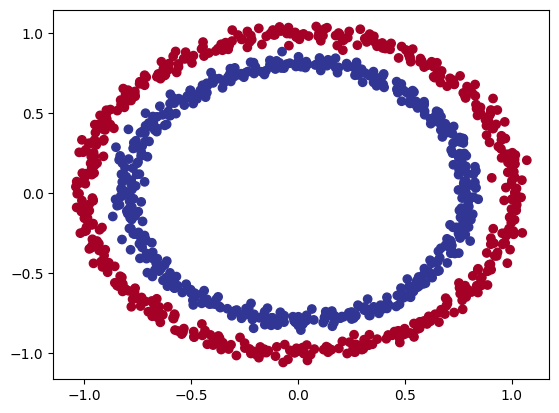

In [6]:
plt.scatter(features[:, 0],features[:, 1], c=Labels, cmap=plt.cm.RdYlBu)

In [7]:
features[0].shape,Labels[1].shape

((2,), ())

In [8]:
import tensorflow as tf

In [9]:
# len(features), len(Labels)
print(features.shape)

(1000, 2)


In [10]:
features.shape[1]

2

**Steps in building a neural network classification**
* Create the model
* Compile the model
* Fit the model
* Evaluate the model
* Tweak 
* Repeat the process until the desired accuracy is achieved.

In [11]:
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

model.fit(features, Labels, epochs=50)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.4741 - loss: 2.3625
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2413 - loss: 0.7387
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4208 - loss: 0.7298
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4543 - loss: 0.7175
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4874 - loss: 0.7031
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5264 - loss: 0.6783
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6575 - loss: 0.6263
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8618 - loss: 0.4436
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9505 - loss: 0.1436
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7561 - loss: 3.0463 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5019 - loss: 7.4544
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5379 - l

In [12]:

model.evaluate(features, Labels)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 0.0032    


[0.004459376912564039, 0.9990000128746033]

In [19]:
import matplotlib.pyplot as plt
import numpy as np 
def plot_deci_boundary(model, features, Labels):
    # define the boundary axes
    x_min, x_max = features[:,0].min()-0.1, features[:,0].max()+0.1
    y_min, y_max = features[:,1].min() -0.1, features[:,1].max()+0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    
    # creaye x values to make prediction on
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # make_prediction
    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        print('Doing binary classifiction')
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(features[:,0], features[:,1], c=Labels,s =40,  cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classifiction


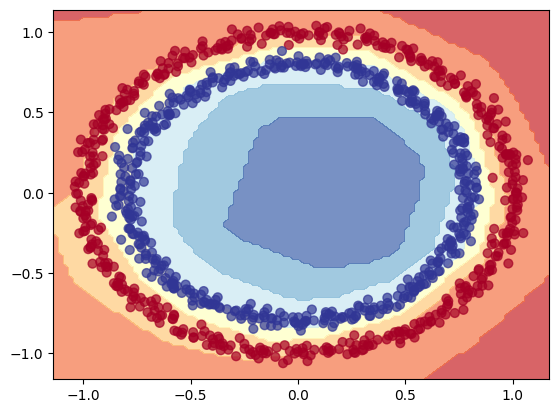

In [20]:
plot_deci_boundary(model, features, Labels)